# Ансамблевые алгоритмы машинного обучения на Python с scikit-learn

> Ансамбли могут повысить точность вашего набора данных.

> В этой записной книжке вы узнаете, как можно создавать некоторые из самых мощных типов ансамблей в Python с помощью Scikit-Learn.

# Объединять предсказания Модели в Ансамблевые Предсказания

Тремя наиболее популярными методами объединения прогнозов из разных моделей являются:

- **Bagging**. Построение нескольких моделей (обычно одного типа) из разных подвыборок обучающего набора данных.
- **Boosting**. Построение нескольких моделей (обычно одного типа), каждая из которых учится исправлять ошибки прогнозирования предыдущей модели в цепочке.
- **Voting**. Для объединения прогнозов используется построение нескольких

*   Новый пункт
*   Новый пункт

моделей (обычно разных типов) и простая статистика (например, вычисление среднего значения).

***

Стандартной задачей классификации, используемой для демонстрации каждого алгоритма ансамбля, является набор данных о начале диабета у индейцев Пима. Это задача бинарной классификации, в которой все входные переменные являются числовыми и имеют разные масштабы.
***

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Загрузка данных

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database") #Индейцы Пима задача диабета

print("Path to dataset files:", path)

c:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [3]:
df = pd.read_csv(path + "/diabetes.csv")
df.head()

#Построить регрессоры
# Для решения классификации сделать из cost классы

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
categorical_val = []
continous_val = []
for column in df.columns:
#     print('==============================')
#     print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

# Предварительная обработка данных (Препроцессинг)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Сколько пропущенных значений отсутствует в каждом элементе
feature_columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

print(f"{column} ==> Пропущенные значения вариант1 : {df.isna().mean()}")
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Значения  вариант2 равные 0: {len(df.loc[df[column] == 0])}")

Outcome ==> Пропущенные значения вариант1 : Pregnancies                0.00
Glucose                    0.00
BloodPressure              0.00
SkinThickness              0.00
Insulin                    0.00
BMI                        0.00
DiabetesPedigreeFunction   0.00
Age                        0.00
Outcome                    0.00
dtype: float64
Pregnancies ==> Значения  вариант2 равные 0: 111
Glucose ==> Значения  вариант2 равные 0: 5
BloodPressure ==> Значения  вариант2 равные 0: 35
SkinThickness ==> Значения  вариант2 равные 0: 227
Insulin ==> Значения  вариант2 равные 0: 374
BMI ==> Значения  вариант2 равные 0: 11
DiabetesPedigreeFunction ==> Значения  вариант2 равные 0: 0
Age ==> Значения  вариант2 равные 0: 0


In [11]:
from sklearn.impute import SimpleImputer


fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)
df[feature_columns] = fill_values.fit_transform(df[feature_columns])

for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Значения  вариант2 равные 0 : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Значения  вариант2 равные 0 : 0
Glucose ==> Значения  вариант2 равные 0 : 0
BloodPressure ==> Значения  вариант2 равные 0 : 0
SkinThickness ==> Значения  вариант2 равные 0 : 0
Insulin ==> Значения  вариант2 равные 0 : 0
BMI ==> Значения  вариант2 равные 0 : 0
DiabetesPedigreeFunction ==> Значения  вариант2 равные 0 : 0
Age ==> Значения  вариант2 равные 0 : 0


In [12]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"МАТРИЦА ОШИБОК (CONFUSION MATRIX):\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY ПАРАМЕТР:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"PRECISION ПАРАМЕТР:\n{precision_score(y_train, y_train_pred):.4f}")
    print(f"RECALL ПАРАМЕТР:\n{recall_score(y_train, y_train_pred):.4f}")
    print(f"F1 МЕРА:\n{f1_score(y_train, y_train_pred):.4f}")
    print(f"ОТЧЕТ О КЛАССИФИКАЦИИ:\n{clf_report}")

    print("РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"МАТРИЦА ОШИБОК (CONFUSION MATRIX):\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY ПАРАМЕТР:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"PRECISION ПАРАМЕТР:\n{precision_score(y_test, y_test_pred):.4f}")
    print(f"RECALL ПАРАМЕТР:\n{recall_score(y_test, y_test_pred):.4f}")
    print(f"F1 МЕРА:\n{f1_score(y_test, y_test_pred):.4f}")
    print(f"ОТЧЕТ О КЛАССИФИКАЦИИ:\n{clf_report}")

# Bagging Algorithms
Агрегация Bootstrap или bagging  включает в себя взятие нескольких выборок из  обучающего набора данных (с заменой) и обучение модели для каждой выборки.

Окончательный прогноз на выходе усредняется по прогнозам всех подмоделей.

Ниже приведены три bagging алгоритма:

1. Bagged Decision Trees
2. Random Forest
3. Extra Trees

## 1. Bagged Decision Trees
Bagging лучше всего работает с алгоритмами, которые имеют высокую дисперсию. Популярным примером являются деревья решений, часто построенные без обрезки (pruning).

**BaggingClassifier**:

BaggingClassifier - это комплексный метаоценщик, который подбирает базовые классификаторы для каждого из случайных подмножеств исходного набора данных, а затем агрегирует их индивидуальные прогнозы (либо путем голосования (voting), либо путем усреднения) для формирования окончательного прогноза. Такая метаоценка обычно может использоваться как способ уменьшить дисперсию оценки "черного ящика" (например, дерева решений) путем введения рандомизации в процедуру ее построения и последующего создания из нее ансамбля.

Этот алгоритм включает в себя несколько работ из литературы. Когда случайные подмножества набора данных рисуются как случайные подмножества выборок, тогда этот алгоритм известен как вставка. Если образцы отбираются с заменой, то этот метод известен как Bagging. Когда случайные подмножества набора данных рисуются как случайные подмножества объектов, тогда метод известен как случайные подпространства (Random Subspaces). Наконец, когда базовые оценки строятся на подмножествах как выборок, так и признаков, тогда метод известен как случайные исправления (Random Patches).

**Параметры BaggingClassifier:**
- `base_estimator`: базовый оценщик для подгонки к случайным подмножествам набора данных. Если нет, то базовой оценкой является дерево решений.
***
- `n_estimators`: количество базовых оценок в ансамбле.
***
- `max_samples`: количество выборок, которые нужно извлечь из X для обучения каждого базового оценщика.
***
- `max_features`: количество объектов, которые нужно извлечь из X для обучения каждого базового оценщика.
***
- `bootstrap`: Рисуются ли образцы с заменой. Если значение равно False, выполняется выборка без замены.
***
- `bootstrap_features`: Рисуются ли объекты с заменой.
***
- `oob_score`: следует ли использовать готовые образцы для оценки ошибки обобщения.
***
- `warm_start`: если установлено значение True, повторно используйте решение предыдущего вызова для подгонки и добавьте больше оценок в ансамбль, в противном случае просто подогоните совершенно новый ансамбль.

In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import tqdm

In [15]:
my_random_state=1234

In [16]:
f1_score_dict = {}
tree = DecisionTreeClassifier()
for n in tqdm.tqdm(range(10, 500, 30), desc="Progress"):
  rf = BaggingClassifier(n_estimators=n,
                              random_state=my_random_state,
                              max_samples=0.3,
                              n_jobs=-1)
  scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')
  avg_f1_score = np.mean(scores)
  f1_score_dict[n] = avg_f1_score

Progress: 100%|██████████| 17/17 [01:08<00:00,  4.03s/it]


In [17]:
f1_score_dict

{10: 0.739523297934462,
 40: 0.7613409304569574,
 70: 0.7685423585368787,
 100: 0.7676499030468142,
 130: 0.7744877873555401,
 160: 0.7699325705193439,
 190: 0.7731083648900675,
 220: 0.7736922786696578,
 250: 0.7719687250637867,
 280: 0.772447145318222,
 310: 0.7723691574318696,
 340: 0.7704036099331668,
 370: 0.773794767012577,
 400: 0.7713391094031168,
 430: 0.7714075878542526,
 460: 0.7679479523237065,
 490: 0.7713391094031168}

In [18]:
import plotly.express as px
px.line(x=f1_score_dict.keys(), y=f1_score_dict.values(), labels={'y':'f1_score','x':'number of trees' })

In [19]:
tree_params = {'criterion':['entropy', ],
               'max_depth':[1, 2, 3, 4, 5,7,10,15],
               'ccp_alpha':[0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1]}

In [20]:
best_f1_score = 0
for criterion in tree_params['criterion']:
  for max_depth in tree_params['max_depth']:
    for ccp_alpha in tree_params['ccp_alpha']:
      dtree = DecisionTreeClassifier(criterion=criterion,
                                     max_depth=max_depth,
                                     ccp_alpha=ccp_alpha,
                                     random_state=my_random_state,
                                     )
      scores = cross_val_score(dtree, X_train, y_train, cv=5, scoring='f1_weighted')
      avg_f1_score = np.mean(scores)
      if avg_f1_score>best_f1_score:
        best_f1_score = avg_f1_score
        best_params = {'criterion':criterion,
                        'max_depth':max_depth,
                        'ccp_alpha':ccp_alpha}

In [21]:
best_params

{'criterion': 'entropy', 'max_depth': 4, 'ccp_alpha': 0.02}

In [22]:
best_tree = DecisionTreeClassifier(**best_params)

In [23]:
some_tree = DecisionTreeClassifier()

In [24]:
bagging_clf = BaggingClassifier(estimator=best_tree, n_estimators=1000, )
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[315  38]
 [ 66 118]]
ACCURACY ПАРАМЕТР:
0.8063
PRECISION ПАРАМЕТР:
0.7564
RECALL ПАРАМЕТР:
0.6413
F1 МЕРА:
0.6941
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.83   0.76      0.81       0.79          0.80
recall      0.89   0.64      0.81       0.77          0.81
f1-score    0.86   0.69      0.81       0.78          0.80
support   353.00 184.00      0.81     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[131  16]
 [ 43  41]]
ACCURACY ПАРАМЕТР:
0.7446
PRECISION ПАРАМЕТР:
0.7193
RECALL ПАРАМЕТР:
0.4881
F1 МЕРА:
0.5816
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.72      0.74       0.74          0.74
recall      0.89  0.49      0.74       0.69          0.74
f1-score    0.82  0.58      0.74       0.70          0.73
support   147.00 84.00      0.74     231.00        23

In [25]:
scores = {}
scores_f1 = {}

In [26]:
scores['Bagging Classifier'] = {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
}

In [27]:
scores_f1['Bagging Classifier'] = {
        'Train': f1_score(y_train, bagging_clf.predict(X_train)),
        'Test': f1_score(y_test, bagging_clf.predict(X_test))
}

## 2. Random Forest

Случайный лес - это метаоценщик, который соответствует нескольким классификаторам дерева решений для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля чрезмерной подгонки.

Размер подвыборки всегда совпадает с исходным размером входной выборки, но выборки рисуются с заменой, если `bootstrap=True` (по умолчанию).

- **Параметры алгоритма случайного леса:**- `n_estimators`: количество деревьев в лесу.
***
- `criterion`: функция для измерения качества разделения. Поддерживаемыми критериями являются "джини" для примеси Джини и `энтропия" для получения информации.
***
- `max_depth`: Максимальная глубина дерева. Если нет, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше выборок `min_samples_split`.
***
- `min_samples_split`: минимальное количество выборок, необходимое для разделения внутреннего узла.
***
- `min_samples_leaf`: минимальное количество выборок, необходимое для нахождения в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет по крайней мере обучающие выборки `min_samples_leaf` в каждой из левой и правой ветвей. Это может привести к сглаживанию модели, особенно при регрессии.
***
- `min_weight_fraction_leaf`: минимальная взвешенная доля от общего количества весов (всех входных выборок), необходимая для нахождения в конечном узле. Образцы имеют одинаковый вес, если sample_weight не указан.
***
- `max_features`: количество функций, которые следует учитывать при поиске наилучшего разделения.
***
- `max_leaf_nodes`: Вырастите дерево с помощью `max_leaf_nodes` наилучшим образом. Наилучшие узлы определяются как относительное уменьшение содержания примесей. Если нет, то неограниченное количество конечных узлов.
***
- `min_impurity_decrease`: Узел будет разделен, если это разделение приведет к уменьшению примеси, большему или равному этому значению.
***
- `min_impurity_split`: порог для ранней остановки роста дерева. Узел разделится, если его примесь превысит пороговое значение, в противном случае это лист.
***
- `bootstrap`: используются ли образцы bootstrap при построении деревьев. Если значение False, то для построения каждого дерева используется весь набор данных.
***
- `oob_score`: следует ли использовать готовые образцы для оценки точности обобщения.
***
- `warm_start`: если установлено значение True, повторно используйте решение предыдущего вызова для подгонки и добавьте больше оценок в ансамбль, в противном случае просто подогоните совершенно новый ансамбль.

In [28]:
RandomForestClassifier?

Object `RandomForestClassifier` not found.


In [29]:
X_train.shape

(537, 8)

{'criterion': 'entropy', 'max_depth': 4, 'ccp_alpha': 0.02}

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=1234, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[353   0]
 [  0 184]]
ACCURACY ПАРАМЕТР:
1.0000
PRECISION ПАРАМЕТР:
1.0000
RECALL ПАРАМЕТР:
1.0000
F1 МЕРА:
1.0000
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   353.00 184.00      1.00     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[133  14]
 [ 44  40]]
ACCURACY ПАРАМЕТР:
0.7489
PRECISION ПАРАМЕТР:
0.7407
RECALL ПАРАМЕТР:
0.4762
F1 МЕРА:
0.5797
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.74      0.75       0.75          0.75
recall      0.90  0.48      0.75       0.69          0.75
f1-score    0.82  0.58      0.75       0.70          0.73
support   147.00 84.00      0.75     231.00        23

{'criterion': 'entropy', 'max_depth': 4, 'ccp_alpha': 0.02}

In [31]:
f1_score_dict = {}
for n in tqdm.tqdm(range(10, 500, 20), desc="Progress"):
  rf = RandomForestClassifier(n_estimators=n,
                              criterion='entropy',
                              max_depth=4, 
                              ccp_alpha=0.02, 
                              random_state=my_random_state,
                              max_samples=0.3,
                              n_jobs=-1)
  scores_val = cross_val_score(rf, X_train, y_train, cv=5, scoring='f1_weighted')
  avg_f1_score = np.mean(scores_val)
  f1_score_dict[n] = avg_f1_score

Progress: 100%|██████████| 25/25 [02:51<00:00,  6.84s/it]


In [32]:
import plotly.express as px
px.line(x=f1_score_dict.keys(), y=f1_score_dict.values(), labels={'y':'f1_score','x':'number of trees' })

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
                                criterion='entropy', 
                                max_depth=4, 
                                ccp_alpha=0.02, 
                                random_state=1234, 
                                n_estimators=50
                                )
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[323  30]
 [ 86  98]]
ACCURACY ПАРАМЕТР:
0.7840
PRECISION ПАРАМЕТР:
0.7656
RECALL ПАРАМЕТР:
0.5326
F1 МЕРА:
0.6282
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.79   0.77      0.78       0.78          0.78
recall      0.92   0.53      0.78       0.72          0.78
f1-score    0.85   0.63      0.78       0.74          0.77
support   353.00 184.00      0.78     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[134  13]
 [ 50  34]]
ACCURACY ПАРАМЕТР:
0.7273
PRECISION ПАРАМЕТР:
0.7234
RECALL ПАРАМЕТР:
0.4048
F1 МЕРА:
0.5191
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.73  0.72      0.73       0.73          0.73
recall      0.91  0.40      0.73       0.66          0.73
f1-score    0.81  0.52      0.73       0.66          0.70
support   147.00 84.00      0.73     231.00        23

In [34]:
rf_clf.classes_

array([0, 1], dtype=int64)

In [35]:
rf_clf.estimator_

DecisionTreeClassifier()

In [36]:
important_lst = rf_clf.feature_importances_ # на основании критерия Джинни (или энтропия) оценивается важность столбцов
feature_names = X_train.columns

In [37]:
for feature, importance in zip(feature_names, important_lst):
    print(f"{feature}: {importance:.3f}")

Pregnancies: 0.038
Glucose: 0.393
BloodPressure: 0.031
SkinThickness: 0.016
Insulin: 0.086
BMI: 0.220
DiabetesPedigreeFunction: 0.068
Age: 0.147


In [38]:
feature_importances_df = pd.DataFrame({
    'feature': feature_names,
    'importance': important_lst
})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
feature_importances_df 

,feature,importance
1,Glucose,0.39
5,BMI,0.22
7,Age,0.15
4,Insulin,0.09
6,DiabetesPedigreeFunction,0.07
0,Pregnancies,0.04
2,BloodPressure,0.03
3,SkinThickness,0.02


C:\Users\user\AppData\Local\Temp\ipykernel_35436\3065290149.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




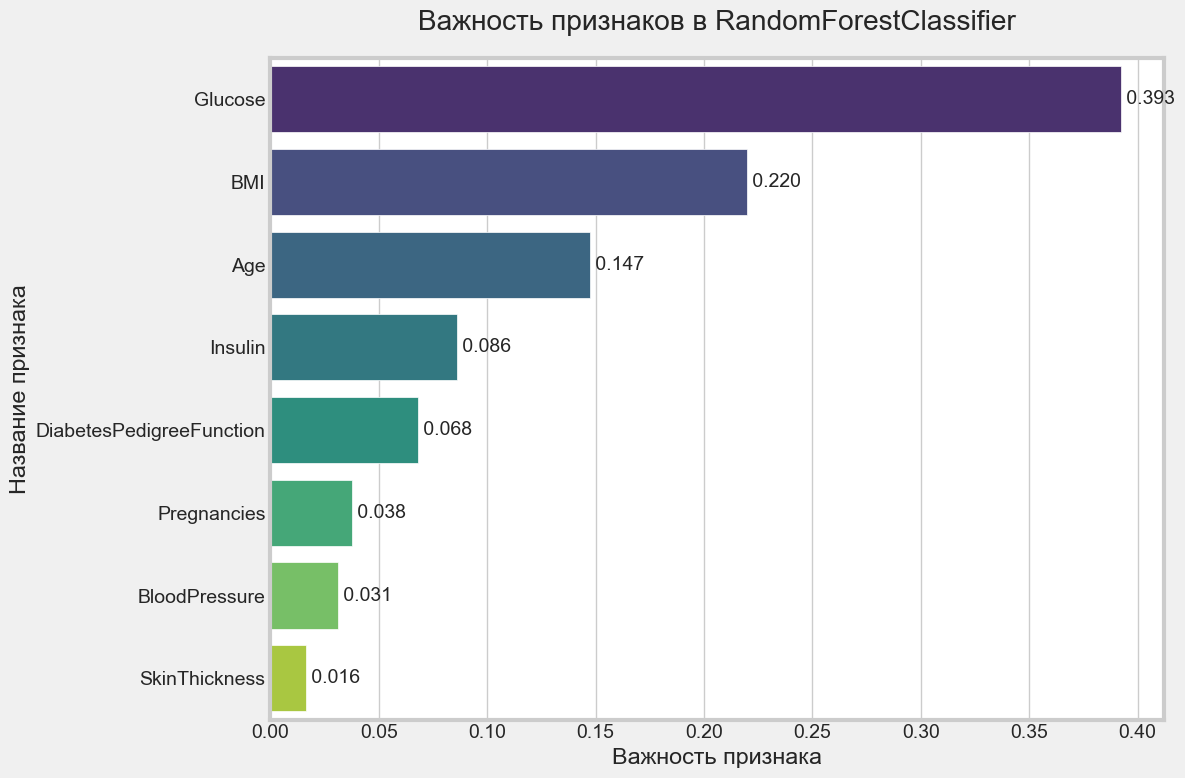


Важность признаков:
                 feature  importance
                 Glucose        0.39
                     BMI        0.22
                     Age        0.15
                 Insulin        0.09
DiabetesPedigreeFunction        0.07
             Pregnancies        0.04
           BloodPressure        0.03
           SkinThickness        0.02


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графика
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Создание горизонтального бар-чарта
ax = sns.barplot(
    x='importance',
    y='feature',
    data=feature_importances_df,
    palette='viridis'
)

# Добавление заголовка и меток
plt.title('Важность признаков в RandomForestClassifier', pad=20)
plt.xlabel('Важность признака')
plt.ylabel('Название признака')

# Добавление значений на график
for i, v in enumerate(feature_importances_df['importance']):
    ax.text(v, i, f' {v:.3f}', va='center')

# Настройка отображения
plt.tight_layout()
plt.show()

# Вывод значений в консоль
print("\nВажность признаков:")
print(feature_importances_df.to_string(index=False))

In [40]:
scores

{'Bagging Classifier': {'Train': 0.8063314711359404,
  'Test': 0.7445887445887446}}

In [41]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

In [42]:
scores_f1['Random Forest'] = {
        'Train': f1_score(y_train, rf_clf.predict(X_train)),
        'Test': f1_score(y_test, rf_clf.predict(X_test)),
}

In [43]:
scores_f1

{'Bagging Classifier': {'Train': 0.6941176470588235,
  'Test': 0.5815602836879432},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488}}

## 3. Extra Trees
Дополнительные деревья (Extra Trees) - это еще одна модификация bagging, при которой случайные деревья строятся из выборок обучающего набора данных.

Вы можете построить модель дополнительных деревьев для классификации, используя класс ExtraTreesClassifier.

**ExtraTreeClassifier**:

Этот класс реализует мета-оценку, которая соответствует ряду рандомизированных деревьев решений (также известных как дополнительные деревья) для различных подвыборок набора данных и использует усреднение для повышения точности прогнозирования и контроля чрезмерной подгонки.

**Параметры ExtraTreeClassifier**:
- `n_estimators`: количество деревьев в лесу.
***
- `criterion`: функция для измерения качества разделения. Поддерживаемыми критериями являются `gini` для примеси Джини Gini impurity и `entropy` для получения информации information gain.
***
- `max_depth`: Максимальная глубина дерева. Если нет, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше выборок `min_samples_split`.
***
- `min_samples_split`: минимальное количество выборок, необходимое для разделения внутреннего узла.
***
- `min_samples_leaf`: минимальное количество выборок, необходимое для нахождения в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет по крайней мере обучающие выборки `min_samples_leaf` в каждой из левой и правой ветвей. Это может привести к сглаживанию модели, особенно при регрессии.
***
- `min_weight_fraction_leaf`: минимальная взвешенная доля от общей суммы весов (всех входных выборок), необходимая для нахождения в конечном узле. Образцы имеют одинаковый вес, если sample_weight не указан.
***
- `max_features`: количество функций, которые следует учитывать при поиске наилучшего разделения.
***
- `max_leaf_nodes`: Вырастите дерево с помощью `max_leaf_nodes` наилучшим образом. Наилучшие узлы определяются как относительное уменьшение содержания примесей. Если нет, то неограниченное количество конечных узлов.
***
- `min_impurity_decrease`: Узел будет разделен, если это разделение приведет к уменьшению примеси, большему или равному этому значению.
***
- `min_impurity_split`: порог для ранней остановки роста дерева. Узел разделится, если его примесь превысит пороговое значение, в противном случае это лист.
***
- `bootstrap`: используются ли образцы bootstrap при построении деревьев. Если значение False, то для построения каждого дерева используется весь набор данных.
***
- `oob_score`: следует ли использовать готовые образцы для оценки точности обобщения.
***
- `warm_start`: если установлено значение True, повторно используйте решение предыдущего вызова для подгонки и добавьте больше оценок в ансамбль, в противном случае просто подогоните совершенно новый ансамбль.

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=1234)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[353   0]
 [  0 184]]
ACCURACY ПАРАМЕТР:
1.0000
PRECISION ПАРАМЕТР:
1.0000
RECALL ПАРАМЕТР:
1.0000
F1 МЕРА:
1.0000
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   353.00 184.00      1.00     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[131  16]
 [ 44  40]]
ACCURACY ПАРАМЕТР:
0.7403
PRECISION ПАРАМЕТР:
0.7143
RECALL ПАРАМЕТР:
0.4762
F1 МЕРА:
0.5714
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.71      0.74       0.73          0.74
recall      0.89  0.48      0.74       0.68          0.74
f1-score    0.81  0.57      0.74       0.69          0.73
support   147.00 84.00      0.74     231.00        23

In [45]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [46]:
scores_f1['Extra Tree'] = {
        'Train': f1_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': f1_score(y_test, ex_tree_clf.predict(X_test)),
}

In [47]:
scores_f1

{'Bagging Classifier': {'Train': 0.6941176470588235,
  'Test': 0.5815602836879432},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714}}

# Boosting Algorithms
Boosting ensemble algorithms создает последовательность моделей, которые пытаются исправить ошибки моделей, предшествующих им в последовательности.

После создания модели делают прогнозы, которые могут быть взвешены по их продемонстрированной точности, и результаты объединяются для создания окончательного выходного прогноза.

Двумя наиболее распространенными алгоритмами машинного обучения boosting ensemble являются:

1. AdaBoost
2. Stochastic Gradient Boosting
***

## 1. AdaBoost
AdaBoost был, пожалуй, первым успешным алгоритмом усиления ансамбля. Обычно это работает путем взвешивания экземпляров в наборе данных по тому, насколько легко или сложно их классифицировать, что позволяет алгоритму уделять им меньше внимания при построении последующих моделей.

Вы можете построить модель AdaBoost для классификации, используя класс AdaBoost Classifier.

**AdaBoostClassifier**:

Классификатор AdaBoost - это метаоценщик, который начинается с подгонки классификатора к исходному набору данных, а затем подгоняет дополнительные копии классификатора к тому же набору данных, но где веса неправильно классифицированных экземпляров корректируются таким образом, чтобы последующие классификаторы больше фокусировались на сложных случаях.

**AdaBoostClassifier Params**:
- `base_estimator`: базовый оценщик, на основе которого строится расширенный ансамбль.
***
- `n_estimators`: максимальное количество оценок, при которых повышение завершается. В случае идеальной подгонки процедура обучения прекращается досрочно.
***
- `learning_rate`: скорость обучения уменьшает вклад каждого классификатора на `learning_rate`. Существует компромисс между `learning_rate` и `n_estimators`.
***
- `algorithm`: если 'SAME.R', то используйте алгоритм реального повышения SAMME.R. `base_estimator` должен поддерживать вычисление вероятностей классов. Если "SAMME", то используйте алгоритм дискретного повышения SAMME. Алгоритм SAMME.R обычно сходится быстрее, чем SAMME, достигая меньшей ошибки тестирования при меньшем количестве итераций повышения.

In [48]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=100)
ada_boost_clf.fit(X_train, y_train) #тренировка на данных
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[317  36]
 [ 73 111]]
ACCURACY ПАРАМЕТР:
0.7970
PRECISION ПАРАМЕТР:
0.7551
RECALL ПАРАМЕТР:
0.6033
F1 МЕРА:
0.6707
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.76      0.80       0.78          0.79
recall      0.90   0.60      0.80       0.75          0.80
f1-score    0.85   0.67      0.80       0.76          0.79
support   353.00 184.00      0.80     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[132  15]
 [ 43  41]]
ACCURACY ПАРАМЕТР:
0.7489
PRECISION ПАРАМЕТР:
0.7321
RECALL ПАРАМЕТР:
0.4881
F1 МЕРА:
0.5857
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.73      0.75       0.74          0.75
recall      0.90  0.49      0.75       0.69          0.75
f1-score    0.82  0.59      0.75       0.70          0.73
support   147.00 84.00      0.75     231.00        23

In [49]:
ada_boost_clf_best = AdaBoostClassifier(estimator=best_tree, n_estimators=100)
ada_boost_clf_best.fit(X_train, y_train) #тренировка на данных
evaluate(ada_boost_clf_best, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[310  43]
 [ 71 113]]
ACCURACY ПАРАМЕТР:
0.7877
PRECISION ПАРАМЕТР:
0.7244
RECALL ПАРАМЕТР:
0.6141
F1 МЕРА:
0.6647
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.72      0.79       0.77          0.78
recall      0.88   0.61      0.79       0.75          0.79
f1-score    0.84   0.66      0.79       0.75          0.78
support   353.00 184.00      0.79     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[134  13]
 [ 43  41]]
ACCURACY ПАРАМЕТР:
0.7576
PRECISION ПАРАМЕТР:
0.7593
RECALL ПАРАМЕТР:
0.4881
F1 МЕРА:
0.5942
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.76  0.76      0.76       0.76          0.76
recall      0.91  0.49      0.76       0.70          0.76
f1-score    0.83  0.59      0.76       0.71          0.74
support   147.00 84.00      0.76     231.00        23

In [55]:
f1_score_dict = {}
for n in tqdm.tqdm(range(10, 250, 20), desc="Progress"):
  ada_boost_clf_estim = AdaBoostClassifier(
                            n_estimators=n,
                            estimator=best_tree,
                            random_state=42
                            )
  scores_val = cross_val_score(ada_boost_clf_estim, X_train, y_train, cv=10, scoring='accuracy')
  avg_f1_score = np.mean(scores_val)
  f1_score_dict[n] = avg_f1_score

Progress: 100%|██████████| 12/12 [00:57<00:00,  4.82s/it]


In [56]:
f1_score_dict

{10: 0.7430468204053109,
 30: 0.7504542278127183,
 50: 0.7504542278127183,
 70: 0.7504542278127183,
 90: 0.7504542278127183,
 110: 0.7504542278127183,
 130: 0.7504542278127183,
 150: 0.7504542278127183,
 170: 0.7504542278127183,
 190: 0.7504542278127183,
 210: 0.7504542278127183,
 230: 0.7504542278127183}

In [87]:
f1_score_dict = {}
for n in tqdm.tqdm([0.1, 0.5, 1.0], desc="Progress"):
  ada_boost_clf_estim = AdaBoostClassifier(
                            n_estimators=30,
                            estimator=best_tree,
                            learning_rate=n
                            )
  scores_val = cross_val_score(ada_boost_clf_estim, X_train, y_train, cv=10, scoring='f1_weighted')
  avg_f1_score = np.mean(scores_val)
  f1_score_dict[n] = avg_f1_score

Progress: 100%|██████████| 3/3 [00:06<00:00,  2.33s/it]


In [88]:
f1_score_dict

{0.1: 0.7493765920192001, 0.5: 0.7460168271864559, 1.0: 0.7420511396940379}

In [90]:
ada_boost_clf = AdaBoostClassifier(estimator=best_tree, learning_rate=1.0, n_estimators=30)
ada_boost_clf.fit(X_train, y_train) #тренировка на данных
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[310  43]
 [ 71 113]]
ACCURACY ПАРАМЕТР:
0.7877
PRECISION ПАРАМЕТР:
0.7244
RECALL ПАРАМЕТР:
0.6141
F1 МЕРА:
0.6647
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.81   0.72      0.79       0.77          0.78
recall      0.88   0.61      0.79       0.75          0.79
f1-score    0.84   0.66      0.79       0.75          0.78
support   353.00 184.00      0.79     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[134  13]
 [ 43  41]]
ACCURACY ПАРАМЕТР:
0.7576
PRECISION ПАРАМЕТР:
0.7593
RECALL ПАРАМЕТР:
0.4881
F1 МЕРА:
0.5942
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.76  0.76      0.76       0.76          0.76
recall      0.91  0.49      0.76       0.70          0.76
f1-score    0.83  0.59      0.76       0.71          0.74
support   147.00 84.00      0.76     231.00        23

In [91]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [92]:
scores

{'Bagging Classifier': {'Train': 0.8063314711359404,
  'Test': 0.7445887445887446},
 'Random Forest': {'Train': 0.7839851024208566, 'Test': 0.7272727272727273},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7402597402597403},
 'AdaBoost': {'Train': 0.7877094972067039, 'Test': 0.7575757575757576}}

In [93]:
scores_f1['AdaBoost'] = {
        'Train': f1_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': f1_score(y_test, ada_boost_clf.predict(X_test)),
}

In [94]:
scores_f1

{'Bagging Classifier': {'Train': 0.6941176470588235,
  'Test': 0.5815602836879432},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6647058823529411, 'Test': 0.5942028985507246}}

## 2. GradientBoosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
GradientBoostingClassifier?

Init signature:
GradientBoostingClassifier(
    *,
    loss='log_loss',
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    criterion='friedman_mse',
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_depth=3,
    min_impurity_decrease=0.0,
    init=None,
    random_state=None,
    max_features=None,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0,
)
Docstring:     
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`~sklearn.ensemble.HistGradientBoostingClassifier` 

{'criterion': 'entropy', 'max_depth': 4, 'ccp_alpha': 0.02}

In [111]:
gradient_boost_clf = GradientBoostingClassifier(n_estimators=100)
gradient_boost_clf.fit(X_train, y_train) #тренировка на данных
evaluate(gradient_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[344   9]
 [ 23 161]]
ACCURACY ПАРАМЕТР:
0.9404
PRECISION ПАРАМЕТР:
0.9471
RECALL ПАРАМЕТР:
0.8750
F1 МЕРА:
0.9096
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.95      0.94       0.94          0.94
recall      0.97   0.88      0.94       0.92          0.94
f1-score    0.96   0.91      0.94       0.93          0.94
support   353.00 184.00      0.94     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[127  20]
 [ 44  40]]
ACCURACY ПАРАМЕТР:
0.7229
PRECISION ПАРАМЕТР:
0.6667
RECALL ПАРАМЕТР:
0.4762
F1 МЕРА:
0.5556
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.74  0.67      0.72       0.70          0.72
recall      0.86  0.48      0.72       0.67          0.72
f1-score    0.80  0.56      0.72       0.68          0.71
support   147.00 84.00      0.72     231.00        23

In [112]:
scores['GradientBoosting'] = {
        'Train': accuracy_score(y_train, gradient_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, gradient_boost_clf.predict(X_test)),
}

In [114]:
scores

{'Bagging Classifier': {'Train': 0.8063314711359404,
  'Test': 0.7445887445887446},
 'Random Forest': {'Train': 0.7839851024208566, 'Test': 0.7272727272727273},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7402597402597403},
 'AdaBoost': {'Train': 0.7877094972067039, 'Test': 0.7575757575757576},
 'GradientBoosting': {'Train': 0.9404096834264432, 'Test': 0.7229437229437229}}

In [113]:
scores_f1['GradientBoosting'] = {
        'Train': f1_score(y_train, gradient_boost_clf.predict(X_train)),
        'Test': f1_score(y_test, gradient_boost_clf.predict(X_test)),
}

In [115]:
scores_f1

{'Bagging Classifier': {'Train': 0.6941176470588235,
  'Test': 0.5815602836879432},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6647058823529411, 'Test': 0.5942028985507246},
 'GradientBoosting': {'Train': 0.9096045197740112, 'Test': 0.5555555555555556}}

## 3. Catboost

In [52]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [53]:
from catboost import CatBoostClassifier

cat_clf = CatBoostClassifier(n_estimators=100)
cat_clf.fit(X_train, y_train) #тренировка на данных
evaluate(cat_clf, X_train, X_test, y_train, y_test)

Learning rate set to 0.065258
0:	learn: 0.6749171	total: 155ms	remaining: 15.4s
1:	learn: 0.6598767	total: 157ms	remaining: 7.69s
2:	learn: 0.6478977	total: 158ms	remaining: 5.12s
3:	learn: 0.6340635	total: 160ms	remaining: 3.83s
4:	learn: 0.6219915	total: 161ms	remaining: 3.06s
5:	learn: 0.6113912	total: 162ms	remaining: 2.54s
6:	learn: 0.5990318	total: 164ms	remaining: 2.17s
7:	learn: 0.5897569	total: 165ms	remaining: 1.9s
8:	learn: 0.5795330	total: 166ms	remaining: 1.68s
9:	learn: 0.5716967	total: 167ms	remaining: 1.51s
10:	learn: 0.5625286	total: 169ms	remaining: 1.36s
11:	learn: 0.5551196	total: 170ms	remaining: 1.25s
12:	learn: 0.5478452	total: 171ms	remaining: 1.15s
13:	learn: 0.5394996	total: 172ms	remaining: 1.06s
14:	learn: 0.5338327	total: 174ms	remaining: 984ms
15:	learn: 0.5269406	total: 175ms	remaining: 918ms
16:	learn: 0.5205044	total: 176ms	remaining: 860ms
17:	learn: 0.5139206	total: 177ms	remaining: 807ms
18:	learn: 0.5079825	total: 179ms	remaining: 761ms
19:	learn: 0

In [54]:
scores['CatBoostClassifier Boosting'] = {
        'Train': accuracy_score(y_train, cat_clf.predict(X_train)),
        'Test': accuracy_score(y_test, cat_clf.predict(X_test)),
    }

In [55]:
scores_f1['CatBoostClassifier Boosting'] = {
        'Train': f1_score(y_train, cat_clf.predict(X_train)),
        'Test': f1_score(y_test, cat_clf.predict(X_test)),
}

In [56]:
scores_f1

{'Bagging Classifier': {'Train': 0.6946107784431138,
  'Test': 0.5915492957746479},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6706948640483383, 'Test': 0.5857142857142857},
 'CatBoostClassifier Boosting': {'Train': 0.7736389684813754,
  'Test': 0.60431654676259}}

## 4. XGBoost

In [57]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [118]:
XGBClassifier?

Init signature:
XGBClassifier(
    *,
    objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to the node,
        - lossguide: Favors splitting at nodes with highest loss change.

    learning_rate : typing.Optional[float

In [130]:
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier(max_depth=4, learning_rate=1.0, n_estimators=10, reg_alpha=0.02)
xgboost_clf.fit(X_train, y_train) #тренировка на данных
evaluate(xgboost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[343  10]
 [ 18 166]]
ACCURACY ПАРАМЕТР:
0.9479
PRECISION ПАРАМЕТР:
0.9432
RECALL ПАРАМЕТР:
0.9022
F1 МЕРА:
0.9222
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.94      0.95       0.95          0.95
recall      0.97   0.90      0.95       0.94          0.95
f1-score    0.96   0.92      0.95       0.94          0.95
support   353.00 184.00      0.95     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[127  20]
 [ 42  42]]
ACCURACY ПАРАМЕТР:
0.7316
PRECISION ПАРАМЕТР:
0.6774
RECALL ПАРАМЕТР:
0.5000
F1 МЕРА:
0.5753
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.68      0.73       0.71          0.72
recall      0.86  0.50      0.73       0.68          0.73
f1-score    0.80  0.58      0.73       0.69          0.72
support   147.00 84.00      0.73     231.00        23

In [131]:
scores['XGBClassifier Boosting'] = {
        'Train': accuracy_score(y_train, xgboost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, xgboost_clf.predict(X_test)),
    }

In [134]:
scores_f1['XGBClassifier Boosting'] = {
        'Train': f1_score(y_train, xgboost_clf.predict(X_train)),
        'Test': f1_score(y_test, xgboost_clf.predict(X_test)),
}

In [133]:
scores

{'Bagging Classifier': {'Train': 0.8063314711359404,
  'Test': 0.7445887445887446},
 'Random Forest': {'Train': 0.7839851024208566, 'Test': 0.7272727272727273},
 'Extra Tree': {'Train': 1.0, 'Test': 0.7402597402597403},
 'AdaBoost': {'Train': 0.7877094972067039, 'Test': 0.7575757575757576},
 'GradientBoosting': {'Train': 0.9404096834264432, 'Test': 0.7229437229437229},
 'XGBClassifier Boosting': {'Train': 0.9478584729981379,
  'Test': 0.7316017316017316}}

In [135]:
scores_f1

{'Bagging Classifier': {'Train': 0.6941176470588235,
  'Test': 0.5815602836879432},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6647058823529411, 'Test': 0.5942028985507246},
 'GradientBoosting': {'Train': 0.9096045197740112, 'Test': 0.5555555555555556},
 'XGBClassifier Boosting': {'Train': 0.9222222222222223,
  'Test': 0.5753424657534246}}

## 5. Stochastic Gradient Boosting
Stochastic Gradient Boosting (также называемые машинами для повышения градиента) - это одна из самых сложных ансамблевых техник. Это также метод, который зарекомендовал себя, пожалуй, как один из лучших методов, доступных для улучшения производительности с помощью ансамблей.

**GradientBoostingClassifier**:

GB строит аддитивную модель поэтапно; она позволяет оптимизировать произвольные дифференцируемые функции потерь. На каждом этапе деревья регрессии `n_classes_` подгоняются по отрицательному градиенту биномиальной или мультиномиальной функции потери отклонения. Бинарная классификация - это особый случай, когда индуцируется только одно дерево регрессии.

**Параметры классификатора GradientBoostingClassifier**:

- `loss`: функция потерь должна быть оптимизирована. "отклонение" относится к отклонению (= логистическая регрессия) для классификации с вероятностными выходными данными. При потере "экспоненциального" градиентного усиления восстанавливается алгоритм AdaBoost.
***
- `learning_rate`: скорость обучения уменьшает вклад каждого дерева на `learning_rate`. Существует компромисс между learning_rate и n_estimators.
***
- `n_estimators`: количество этапов повышения, которые необходимо выполнить. Градиентное усиление довольно устойчиво к чрезмерной подгонке, поэтому большое количество обычно приводит к повышению производительности.
***
- `подвыборка`: доля выборок, которая будет использоваться для подбора индивидуальных базовых учащихся. Если значение меньше 1,0, это приводит к увеличению стохастического градиента. `подвыборка` взаимодействует с параметром `n_estimators`. Выбор "подвыборки < 1,0` приводит к уменьшению дисперсии и увеличению смещения.
***
- `criterion`: функция для измерения качества разделения. Поддерживаемыми критериями являются "friedman_mse" для среднеквадратичной ошибки с оценкой улучшения по Фридману, "`mse`" для среднеквадратичной ошибки и "`mae`" для средней абсолютной ошибки. Значение по умолчанию "friedman_mse", как правило, является наилучшим, поскольку в некоторых случаях оно может обеспечить лучшее приближение.
***
- `min_samples_split`: минимальное количество выборок, необходимое для разделения внутреннего узла.
***
- `min_samples_leaf`: минимальное количество выборок, необходимое для нахождения в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет по крайней мере обучающие выборки `min_samples_leaf` в каждой из левой и правой ветвей. Это может привести к сглаживанию модели, особенно при регрессии.
***
- `min_weight_fraction_leaf`: минимальная взвешенная доля от общей суммы весов (всех входных выборок), необходимая для нахождения в конечном узле. Образцы имеют одинаковый вес, если sample_weight не указан.
***
- `max_depth`: максимальная глубина отдельных регрессионных оценок. Максимальная глубина ограничивает количество узлов в дереве. Настройте этот параметр для достижения наилучшей производительности; наилучшее значение зависит от взаимодействия входных переменных.
***
- `min_impurity_decrease`: Узел будет разделен, если это разделение приведет к уменьшению примеси, большему или равному этому значению.
***
- `min_impurity_split`: порог для ранней остановки роста дерева. Узел разделится, если его примесь превысит пороговое значение, в противном случае это лист.
***
- `max_features`: количество функций, которые следует учитывать при поиске наилучшего разделения.
***
- `max_leaf_nodes`: Выращивайте деревья с помощью `max_leaf_nodes` наилучшим образом. Наилучшие узлы определяются как относительное уменьшение содержания примесей. Если нет, то неограниченное количество конечных узлов.
***
- `warm_start`: если установлено значение `True`, повторно используйте решение предыдущего вызова для подгонки и добавьте больше оценок в ансамбль, в противном случае просто удалите предыдущее решение.
***
- `validation_fraction`: доля обучающих данных, которую следует отложить в качестве набора проверки для ранней остановки. Должно быть в диапазоне от 0 до 1. Используется только в том случае, если для параметра `n_iter_no_change` задано целое число.
***
- `n_iter_no_change`: используется для определения того, будет ли использоваться досрочная остановка для прекращения обучения, если оценка проверки не улучшается. По умолчанию для отключения ранней остановки установлено значение "Нет". Если задано значение number, оно будет использовать размер обучающих данных `validation_fraction` в качестве проверки и завершит обучение, когда оценка проверки не улучшится во всех предыдущих `n_iter_no_change` числах итераций. Раскол носит стратифицированный характер.
***
- `tol`: Допуск к ранней остановке. Когда потери не увеличиваются по крайней мере на tol для итераций `n_iter_no_change` (если задано число), обучение прекращается.
***
- `ccp_alpha`: Параметр сложности, используемый для сокращения сложности с минимальными затратами. Будет выбрано поддерево с наибольшей стоимостной сложностью, которая меньше, чем `ccp_alpha`.
***

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=1234)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[344   9]
 [ 23 161]]
ACCURACY ПАРАМЕТР:
0.9404
PRECISION ПАРАМЕТР:
0.9471
RECALL ПАРАМЕТР:
0.8750
F1 МЕРА:
0.9096
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.94   0.95      0.94       0.94          0.94
recall      0.97   0.88      0.94       0.92          0.94
f1-score    0.96   0.91      0.94       0.93          0.94
support   353.00 184.00      0.94     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[128  19]
 [ 44  40]]
ACCURACY ПАРАМЕТР:
0.7273
PRECISION ПАРАМЕТР:
0.6780
RECALL ПАРАМЕТР:
0.4762
F1 МЕРА:
0.5594
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.74  0.68      0.73       0.71          0.72
recall      0.87  0.48      0.73       0.67          0.73
f1-score    0.80  0.56      0.73       0.68          0.71
support   147.00 84.00      0.73     231.00        23

In [63]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [64]:
scores_f1['Gradient Boosting'] = {
        'Train': f1_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': f1_score(y_test, grad_boost_clf.predict(X_test)),
}

In [65]:
scores_f1

{'Bagging Classifier': {'Train': 0.6946107784431138,
  'Test': 0.5915492957746479},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6706948640483383, 'Test': 0.5857142857142857},
 'CatBoostClassifier Boosting': {'Train': 0.7736389684813754,
  'Test': 0.60431654676259},
 'XGBClassifier Boosting': {'Train': 1.0, 'Test': 0.6040268456375839},
 'Gradient Boosting': {'Train': 0.9096045197740112,
  'Test': 0.5594405594405595}}

# Ансамбль для Voting

Voting  - один из простейших способов объединения прогнозов, полученных с помощью нескольких алгоритмов машинного обучения.

Это работает путем предварительного создания двух или более автономных моделей из вашего обучающего набора данных. Затем классификатор голосования можно использовать для переноса ваших моделей и усреднения прогнозов подмоделей, когда их попросят сделать прогнозы для новых данных.

Предсказания подмоделей могут быть взвешены, но задать веса для классификаторов вручную или даже эвристически сложно. Более продвинутые методы позволяют узнать, как наилучшим образом взвешивать прогнозы из подмоделей, но это называется стекированием (stacked generalization) и в настоящее время не предоставляется в Scikit-learn.

**Классификатор Voting ** :
- `estimators`: Вызов метода `fit` в `VotingClassifier` приведет к подбору клонов тех исходных оценок, которые будут сохранены в атрибуте класса `self.estimators_`.
***
- `voting`: если "hard", использует предсказанные метки классов для голосования по правилу большинства. В противном случае, если "soft", спрогнозируйте метку класса на основе argmax сумм предсказанных вероятностей, что рекомендуется для ансамбля хорошо откалиброванных классификаторов.
***

In [66]:
from sklearn.ensemble import VotingClassifier # Похоже Стэккинг
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

РЕЗУЛЬТАТЫ ОБУЧЕНИЯ (ОБУЧАЮЩАЯ ВЫБОРКА): 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[330  23]
 [ 71 113]]
ACCURACY ПАРАМЕТР:
0.8250
PRECISION ПАРАМЕТР:
0.8309
RECALL ПАРАМЕТР:
0.6141
F1 МЕРА:
0.7063
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0      1  accuracy  macro avg  weighted avg
precision   0.82   0.83      0.82       0.83          0.83
recall      0.93   0.61      0.82       0.77          0.82
f1-score    0.88   0.71      0.82       0.79          0.82
support   353.00 184.00      0.82     537.00        537.00
РЕЗУЛЬТАТЫ ТЕСТОВОЙ ВЫБОРКИ: 
МАТРИЦА ОШИБОК (CONFUSION MATRIX):
[[136  11]
 [ 46  38]]
ACCURACY ПАРАМЕТР:
0.7532
PRECISION ПАРАМЕТР:
0.7755
RECALL ПАРАМЕТР:
0.4524
F1 МЕРА:
0.5714
ОТЧЕТ О КЛАССИФИКАЦИИ:
               0     1  accuracy  macro avg  weighted avg
precision   0.75  0.78      0.75       0.76          0.76
recall      0.93  0.45      0.75       0.69          0.75
f1-score    0.83  0.57      0.75       0.70          0.73
support   147.00 84.00      0.75     231.00        23

In [67]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

In [68]:
scores_f1['Voting'] = {
        'Train': f1_score(y_train, voting.predict(X_train)),
        'Test': f1_score(y_test, voting.predict(X_test)),
}

In [69]:
scores_f1

{'Bagging Classifier': {'Train': 0.6946107784431138,
  'Test': 0.5915492957746479},
 'Random Forest': {'Train': 0.6282051282051282, 'Test': 0.5190839694656488},
 'Extra Tree': {'Train': 1.0, 'Test': 0.5714285714285714},
 'AdaBoost': {'Train': 0.6706948640483383, 'Test': 0.5857142857142857},
 'CatBoostClassifier Boosting': {'Train': 0.7736389684813754,
  'Test': 0.60431654676259},
 'XGBClassifier Boosting': {'Train': 1.0, 'Test': 0.6040268456375839},
 'Gradient Boosting': {'Train': 0.9096045197740112,
  'Test': 0.5594405594405595},
 'Voting': {'Train': 0.70625, 'Test': 0.5714285714285714}}

# Сравнение моделей

<Axes: >

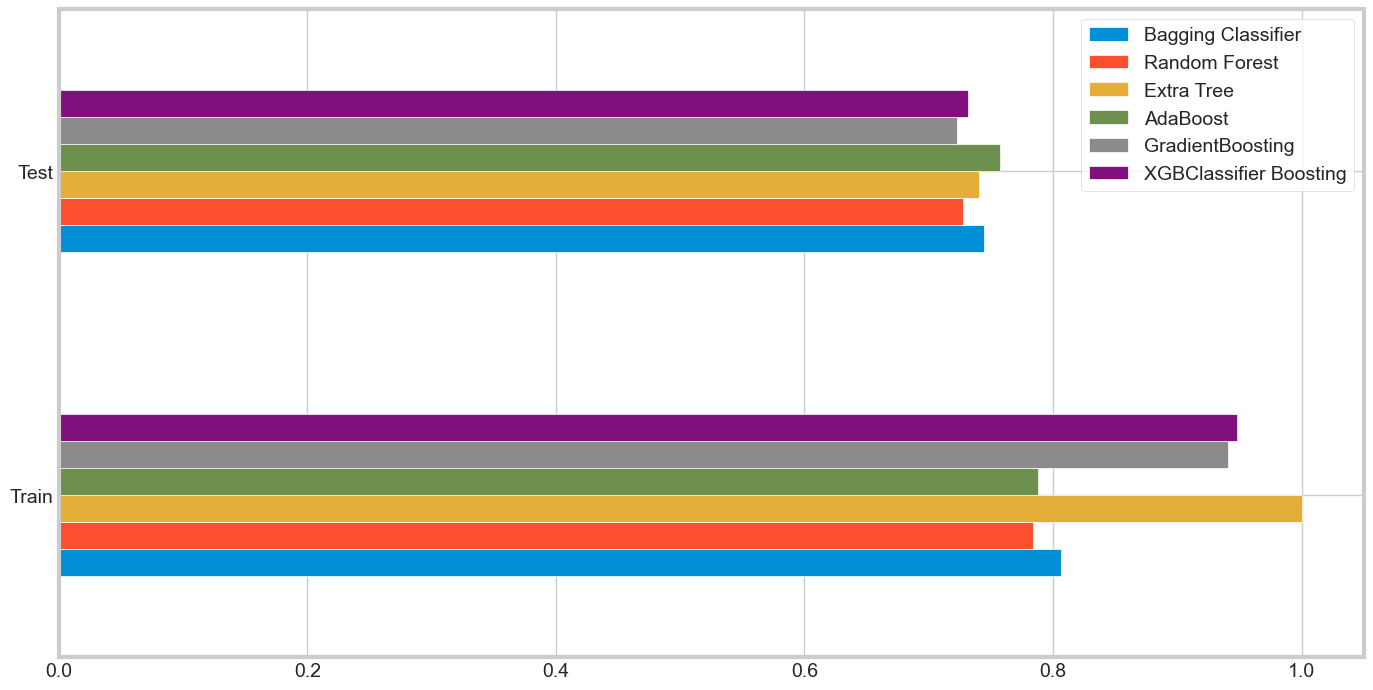

In [136]:
# Сравнение моделей по Accuracy

scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

<Axes: >

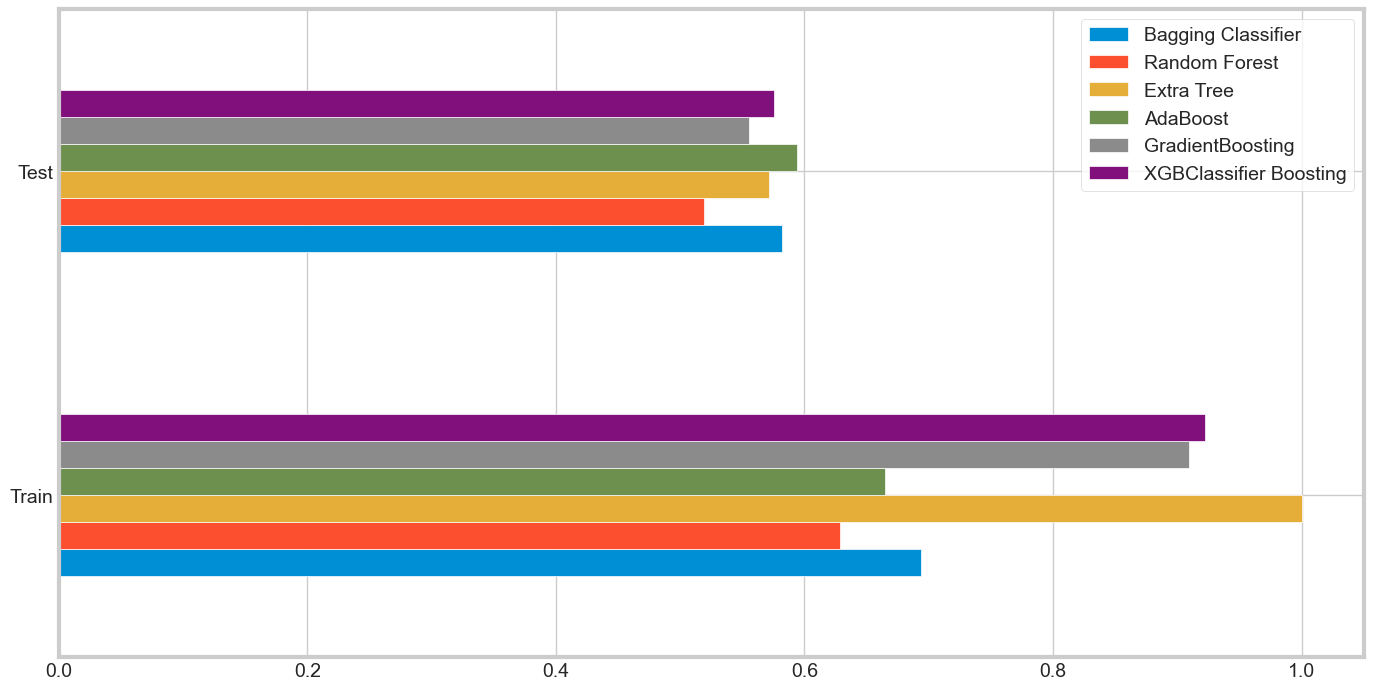

In [137]:
# Сравнение моделей по F1 мере

scores_f1_df = pd.DataFrame(scores_f1)

scores_f1_df.plot(kind='barh', figsize=(15, 8))

In [72]:
scores_f1_df

,Bagging Classifier,Random Forest,Extra Tree,AdaBoost,CatBoostClassifier Boosting,XGBClassifier Boosting,Gradient Boosting,Voting
Train,0.69,0.63,1.00,0.67,0.77,1.00,0.91,0.71
Test,0.59,0.52,0.57,0.59,0.60,0.60,0.56,0.57


## Краткое описание
В этом блокноте сравнили для себя алгоритмы ансамблевого машинного обучения  для повышения производительности моделей в  задаче определения диабета.

Вы узнали о:

1. Bagging Ensembles, включая Bagged Decision Trees, Random Forest, и Extra Trees.
2. Boosting Ensembles, включая AdaBoost и Stochastic Gradient Boosting.
3. Voting Ensembles для усреднения прогнозов для любых произвольных моделей.

## Ссылки:
- [Ансамбли в машинном обучении. ШАД](https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii)
- [Градиентный бустинг. ШАД](https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting)
- [Алгоритмы пакетирования и случайного лесного ансамбля для машинного Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
- [Ансамблевые алгоритмы машинного обучения на Python с scikit-learn](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)
[Библиотека Scikit-learn](https://scikit-learn.org/stable /)
